Programming different metrics for sequence conservation in multiple alignments:
 - Entropy 
 - Wu Variability

In [14]:
# import libraries
from collections import Counter
from Bio import AlignIO
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import numpy as np
import csv

## Parsing aligned fasta file

In [2]:
# first we must parse the aligned input file (clustal)
alignment = AlignIO.read("data/MSA-aligned.fst", "fasta")
print(alignment)

Alignment with 22 rows and 2259 columns
--------------------------------------------...--- Chaetomium_thermophilum
--------------------------------------------...--- Aspergillus_niger_1
MAIFSKFKRKKAFPLEQSVGKDQTKETPPYATVAEQPRSTLPAP...--- Aspergillus_niger_2
--------------------------------------------...--- T.terrestris
--------------------------------------------...--- T.thermophilus
--------------------------------------------...--- C.truncatum
--------------------------------------------...--- C.chlorophyti
--------------------------------------------...--- P.comata
--------------------------------------------...--- C.karsti
--------------------------------------------...--- A.welwitschiae
--------------------------------------------...--- A.awamori
--------------------------------------------...--- A.tubingensis
--------------------------------------------...--- T.rugulosus
--------------------------------------------...--- A.turcosus
--------------------------------------------...G

## Shannon Entropy

In [3]:
def shannon(alignment):
    entropies = []
    
    for i in range(alignment.get_alignment_length()):
        column = list(alignment[:,i].replace('-',''))
        num_residues = len(column)
        counts = Counter(column)
        entropy = 0
        
        for count in counts.values():
            prop = count / num_residues
            entropy -= prop * math.log2(prop)
        entropies.append(entropy)
    
    return entropies

## Wu Variability

In [12]:
def wu_tang(alignment):
    num_seq = len(alignment)
    varlist = []
    
    for i in range(alignment.get_alignment_length()):
        column = list(alignment[:,i].replace('-',''))
        counts = Counter(column)
        most_common = counts.most_common(1)[0][1]
        num_AAs = len(counts)
        wu_tang = (num_AAs * num_seq)/most_common
        varlist.append(wu_tang)
        
    return varlist


In [13]:
def smooth(arr, n):
    new_arr = []
    for i in range(n, len(arr)):
        new_arr.append(sum([arr[i-j] for j in range(n)]))
    return new_arr

def save_csv(lists, names, filename):
    with open(filename, mode="w+") as f:
        writer = csv.DictWriter(f, fieldnames=names)
        writer.writeheader()
        for i in range(len(lists[0])):
            d = {}
            for j, n in enumerate(names):
                d[n] = lists[j][i]
            writer.writerow(d)

In [15]:
wu_variance = wu_var(alignment)
shannon_entropy = shannon(alignment)
nu_smoothed = smooth(wu_variance, 4)
shannon_smoothed = smooth(shannon_entropy, 4)
ts = [i for i in range(len(nu_smoothed))]

save_csv([nu_smoothed, shannon_smoothed, ts], ["nu", "sh", "ts"], "conservation.csv")

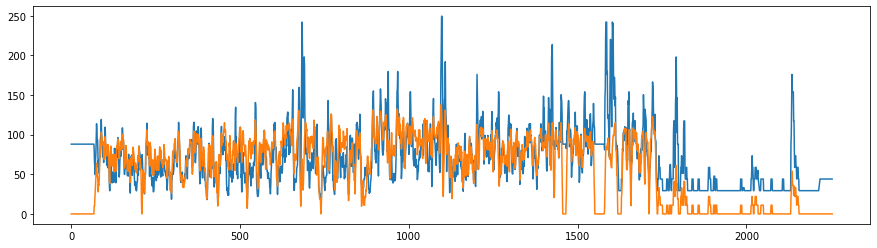

In [11]:
plt.figure(figsize=(15,4))
plt.plot(nu_smoothed)
plt.plot(np.array(shannon_smoothed)*12)
plt.show()